## Analyse de la base de données 'E-Commerce'
- `InvoiceNo`:Un numéro intégral à 6 chiffres attribué de manière unique à chaque transaction. Si ce code commence par la lettre « c », cela indique une annulation.
- `StockCode`:Un numéro intégral à 5 chiffres attribué de manière unique à chaque produit distinct.
- `Description`:Nom du produit (article)
- `Quantity`:Les quantités de chaque produit (article) par transaction
- `InvoiceDate`:Le jour et l’heure de génération de chaque transaction
- `UnitPrice`:Prix unitaire du produit en sterling (livre)
-  `CustomerID`:Un numéro intégral à 5 chiffres attribué de manière unique à chaque client
- `Country`:Country

In [1]:
import pandas as pd

df= pd.read_csv("online_retail.csv")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [2]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [3]:
# Dimension du data frame
df.shape


(541909, 8)

In [22]:
df.describe

<bound method NDFrame.describe of         InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  \
0               0       3536         3918       334         6838        182   
1               0       2794         3926       334         6838        228   
2               0       3044          913       336         6838        190   
3               0       2985         1910       334         6838        228   
4               0       2984         2911       334         6838        228   
...           ...        ...          ...       ...          ...        ...   
541904      22060       1527         2379       340         9391         71   
541905      22060       1803          743       334         9391        155   
541906      22060       2145          749       332         9391        265   
541907      22060       2146          748       332         9391        265   
541908      22060       1093          304       331         9391        297   

        CustomerI

In [4]:
#voir les donnees manquant
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
#remplacer les valeur manquant
df['Description'].fillna('inconnu', inplace=True)
#remplacer les valeur manquant par un identifiants uniques
#df['CustomerID'] = df['CustomerID'].fillna('AUTO_GEN_ID_' + df.index.astype(str))






In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.CustomerID 

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 541909, dtype: float64

<AxesSubplot:>

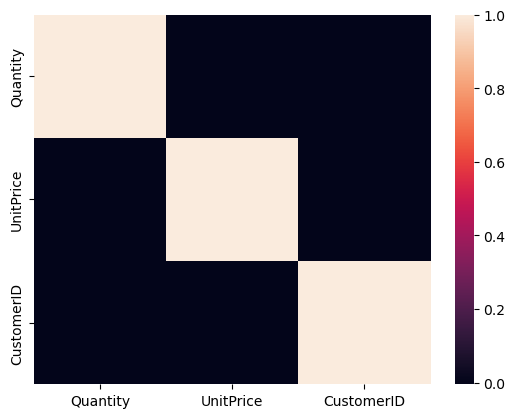

In [10]:
#matrice de correlation
import seaborn as sns
sns.heatmap(df.corr())

Analyse de donnee

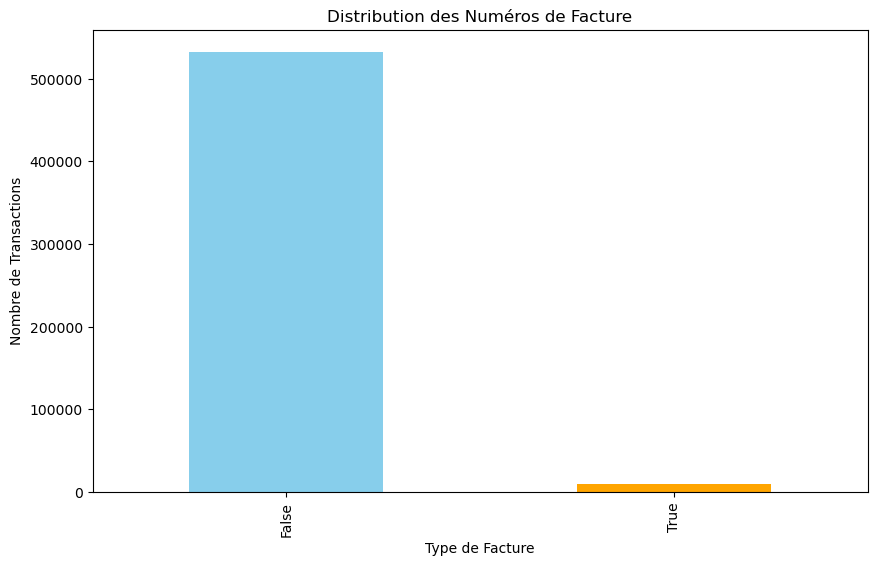

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Création d'une colonne indiquant si la facture est annulée
df['Annulation'] = df['InvoiceNo'].str.startswith('C')
# Utilisation de value_counts pour obtenir le nombre de factures normales et annulées
counts = df['Annulation'].value_counts()
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution des Numéros de Facture')
plt.xlabel('Type de Facture')
plt.ylabel('Nombre de Transactions')
#plt.xticks([0, 1], ['Factures normales', 'Annulations'], rotation=0)
plt.show()


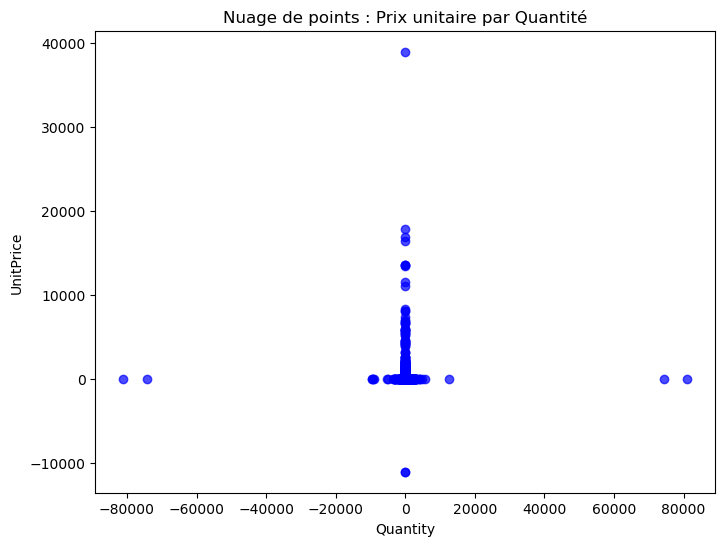

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
#
plt.figure(figsize=(8, 6))
plt.scatter(df['Quantity'], df['UnitPrice'], color='blue', alpha=0.7)
plt.title('Nuage de points : Prix unitaire par Quantité')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()


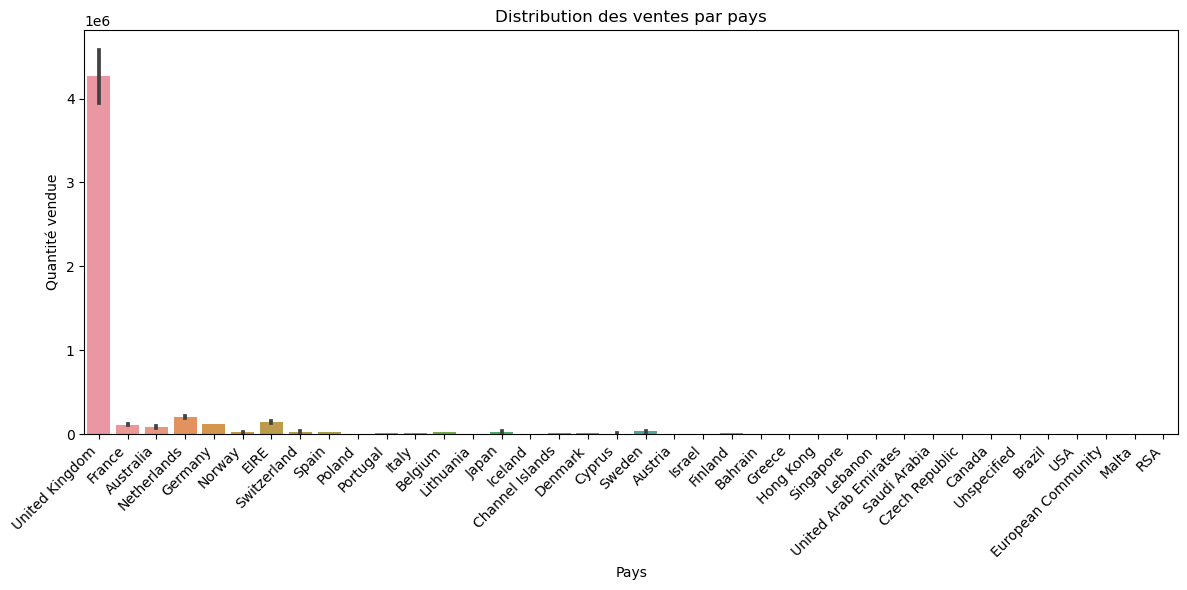

In [13]:
# Distribution des ventes par pays
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Country', y='Quantity', data=df, estimator=sum)
plt.title('Distribution des ventes par pays')
plt.xlabel('Pays')
plt.ylabel('Quantité vendue')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()


In [9]:
# Calcul du chiffre d'affaires total de chaque transaction
df['Revenue'] = df['Quantity'] * df['UnitPrice']
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
0  12/1/10 8:26       2.55     17850.0  United Kingdom    15.30  
1  12/1/10 8:26       3.39     17850.0  United Kingdom    20.34  
2  12/1/10 8:26       2.75     17850.0  United Kingdom    22.00  
3  12/1/10 8:26       3.39     17850.0  United Kingdom    20.34  
4  12/1/10 8:26       3.39     17850.0  United Kingdom    20.34  


In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [11]:
#encoder les variable qualitative
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
columns=["Description","Annulation","Country","InvoiceNo","StockCode","InvoiceDate"]
for col in df.columns:
    df[col]=encoder.fit_transform(df[col])
    


In [12]:
#fractionner les donnees
x=df.drop("Revenue",axis=1)
y=df.Revenue.values

In [13]:
#normaliser les donnee
import joblib
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
joblib.dump(scaler, 'scaler.pkl')  # Sauvegardez le scaler

['scaler.pkl']

In [14]:
#spliter les donnees 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_val , x_test , y_val,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

In [15]:
#afficher les dimensions
print("les donnes d'entrainement :",x_train.shape , y_train.shape)
print("les donnes test :",x_test.shape , y_test.shape)
print("les donnes de validation  :",x_val.shape , y_val.shape)

les donnes d'entrainement : (433527, 8) (433527,)
les donnes test : (54191, 8) (54191,)
les donnes de validation  : (54191, 8) (54191,)


In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import numpy as np


In [17]:
import joblib
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error

params = {
    'alpha': np.logspace(-8, 8, 100),
    "fit_intercept": [True, False]
} 

models = {
    'LinearRegression': LinearRegression(),
    'RidgeRegression': GridSearchCV(Ridge(), params, cv=5),
    'Lasso': GridSearchCV(Lasso(), params, cv=5) 
} 

def accu(y_true, y_pred, retu=False):
    R2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    if retu:
        return R2, mse
    else:
        print(f"La précision du modèle est de : {np.round(R2, 7)}, {np.round(mse, 7)}")

def train_test_eval(models, x_train, y_train, x_val, y_val):
    trained_models = {}  # Dictionnaire pour stocker les modèles entraînés

    for name, model in models.items():
        print(name, ':')
        if isinstance(model, GridSearchCV):
            model.fit(x_train, y_train)
            best_model = model.best_estimator_
            accu(y_val, best_model.predict(x_val))
            trained_models[name] = best_model  # Ajouter le meilleur modèle au dictionnaire
        else:
            model.fit(x_train, y_train)
            accu(y_val, model.predict(x_val))
            trained_models[name] = model  # Ajouter le modèle au dictionnaire

        # Enregistrer le modèle entraîné
        joblib.dump(trained_models[name], f'{name}_model.pkl')
        print(f"Modèle {name} enregistré.")
        print('-'*30)

    return trained_models  # Retourner les modèles entraînés pour une utilisation ultérieure

# Assurez-vous d'avoir défini x_train, y_train, x_val, y_val auparavant
trained_models = train_test_eval(models, x_train, y_train, x_val, y_val)


LinearRegression :
La précision du modèle est de : 0.5489096, 170614.6987402
Modèle LinearRegression enregistré.
------------------------------
RidgeRegression :
La précision du modèle est de : 0.5489236, 170609.4027434
Modèle RidgeRegression enregistré.
------------------------------
Lasso :
La précision du modèle est de : 0.5489128, 170613.4856193
Modèle Lasso enregistré.
------------------------------


In [18]:
trained_models

{'LinearRegression': LinearRegression(),
 'RidgeRegression': Ridge(alpha=104.76157527896662),
 'Lasso': Lasso(alpha=0.0200923300256505)}

In [19]:
x = trained_models["LinearRegression"]
x.coef_ 

array([-28.6106449 ,  13.23206081,   4.99424357, 418.46573614,
         9.12897214, 248.40903835, -76.97931072, -31.2284389 ])

In [20]:
# Entraînement du meilleur modèle (Ridge regression dans ce cas)
best_model = models['RidgeRegression']
best_model.fit(x_train, y_train)

# Prédiction sur les données de test (les 3 premières observations)
x_test_3 = x_test[:3]
y_pred_3 = best_model.predict(x_test_3)


# Affichage des prédictions
for i in range(3):
    print(f'Observation {i+1} - Chiffre d\'affaires prédit : {np.round(y_pred_3[i], 2)} --- Chiffre d\'affaires réel : {y_test[i]}')


Observation 1 - Chiffre d'affaires prédit : 2085.65 --- Chiffre d'affaires réel : 1963
Observation 2 - Chiffre d'affaires prédit : 1822.6 --- Chiffre d'affaires réel : 1866
Observation 3 - Chiffre d'affaires prédit : 1561.39 --- Chiffre d'affaires réel : 1392


In [21]:
import joblib

# Entraînement du meilleur modèle (Linear Regression dans ce cas)
best_model = models['RidgeRegression']
# Enregistrer le modèle avec Joblib
joblib.dump(best_model, 'best_model_ridge_regression.pkl')




['best_model_ridge_regression.pkl']